In [1]:
# first we need to import the most Important two librarys pandas and numpy

In [2]:
import numpy as np
import pandas as pd

In [3]:
# then we need to load the data to a variable let's call it cars

In [4]:
cars=pd.read_csv('car_data.csv')

In [5]:
# head() function is used to monitor the data columns names which will be used in analysis later

In [6]:
cars.head()

,Unnamed: 0,Model,Year,Status,Mileage,Price,MSRP
0,0,2022 Acura TLX A-Spec,2022,New,Not available,"$49,445","MSRP $49,445"
1,1,2023 Acura RDX A-Spec,2023,New,Not available,"$50,895",Not specified
2,2,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified
3,3,2023 Acura TLX Type S,2023,New,Not available,"$57,545",Not specified
4,4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.","$40,990",$600 price drop


In [7]:
# first let us see how sataus are varied throw cars

In [8]:
a=cars["Status"].value_counts()
a

Used                    61849
New                     47852
Porsche Certified        1921
Acura Certified          1053
INFINITI Certified        870
Volkswagen Certified      797
BMW Certified             609
Dodge Certified           388
Chevrolet Certified       211
Toyota Certified          183
Ford Certified             29
Name: Status, dtype: int64

In [9]:
# then Draw to see how they vary viusally .. it's easier this way

In [10]:
a.plot.bar(figsize=(15,8))

In [11]:
# we notice that it containes alot of used and new cars .. and other various status
# let's see how used and new status varies throw years

In [12]:
b1=(cars["Status"]=="New")
b2=(cars["Status"]=="Used")
b3=cars[b1 | b2].groupby('Status')["Year"].value_counts()
b3.head(20)

Status  Year
New     2023    33987
        2022    13342
        2021      467
        2020       36
        2019        7
        2018        6
        2017        4
        2015        2
        2014        1
Used    2019     8826
        2020     8621
        2021     7768
        2018     6284
        2022     6078
        2017     4704
        2016     4038
        2015     3413
        2014     2430
        2013     2101
        2012     1275
Name: Year, dtype: int64

In [13]:
# we Concluds that only new cars are exsited from 2014 and that new cars are huge in the years 2023 and 2022
# so, let's focus on these two years and see the defference in price between used and new cars

In [14]:
c1=cars['Year'].isin([2023,2000])
# we need to convert dollar signs and comma to a float number
c2=cars["Price"]!="Not Priced"
c3=cars[c2]
c3["Price"]=c3["Price"].replace('[\$,]',"",regex=True).astype(float)

# then group the the prices and calulate it's average
c3.head()
c4=c3[(b1|b2)&c1].groupby(["Status"])["Price"].mean()
c4

C:\Users\AbdallahZiadi.DESKTOP-6HAVQF1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\AbdallahZiadi.DESKTOP-6HAVQF1\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Status
New     64995.411716
Used    61822.803401
Name: Price, dtype: float64

In [15]:
# we see almost new cars are better than Used cars and there is almost 1 thousand only as an average
# if we extend the years from 2023 to 2000 will notice a defferice of almost 3 thousands

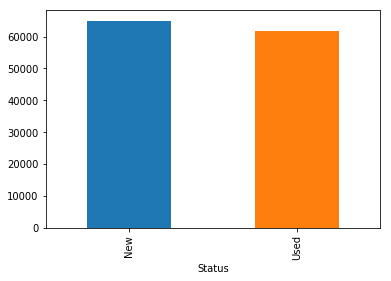

In [16]:
c4.plot.bar()

In [17]:
# now , let's see what are the Car models that 75% of them are Used During the interval 2023 to 2000

In [18]:
d1=cars[["Model","Status","Year"]]
d2=d1[(b1|b2)&c1]["Model"].value_counts()
UsedModel=d1[b2&c1]["Model"].value_counts()
Total=d2[(d2.index).isin(UsedModel.index)]
Model_75=Total[(UsedModel.values/Total.values)>0.75].index
Model_75


Index(['2000 Dodge Ram 1500 Quad Cab', '2000 Dodge Dakota Sport',
       '2023 Tesla Model X Plaid', '2000 Ford Excursion Limited',
       '2000 Dodge Ram 2500 ST', '2000 Volkswagen Eurovan MV',
       '2023 Porsche Cayenne S Coupe AWD', '2000 Dodge Viper RT-10',
       '2023 Porsche Panamera Sport Turismo 4',
       '2000 Dodge Ram 2500 SLT Quad Cab', '2000 Dodge Ram 3500 ',
       '2023 Toyota Supra ',
       '2023 Porsche Cayenne EXECUTIVE DEMO- BALANCE OF WARRANTY AND CPO!',
       '2023 Lexus GX 460 Premium', '2023 Tesla Model X AWD',
       '2023 Tesla Model S BASE', '2000 Volkswagen Golf GL',
       '2000 BMW Z3 M 3.2L', '2023 Toyota Camry XLE V6',
       '2000 Chevrolet Express 3500 Cargo', '2000 Acura NSX T',
       '2000 Dodge Ram 2500 SLT', '2000 BMW M5 Base',
       '2000 Lexus SC 300 Base (A4)', '2023 BMW M3 Sedan',
       '2023 Porsche 911 Carrera T', '2023 Volkswagen Jetta GLI Autobahn',
       '2000 Dodge Durango SLT', '2000 BMW 750 750iL',
       '2023 Porsche Cayenne 